In [1]:
import os
import numpy as np
import nibabel as nib
from dipy.io.image import load_nifti
from dipy.io import read_bvals_bvecs
import matplotlib.pyplot as plt
import sigpy as sp
import sigpy.plot as pl
import numpy as np
import nibabel as nib
import dipy.reconst.dti as dti
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs
from dipy.core.gradients import gradient_table
import os
import nibabel as nib
from dipy.data import fetch_bundles_2_subjects
from dipy.io.image import load_nifti, load_nifti_data
import scipy
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio

/Users/arielhannum/opt/anaconda3/lib/python3.8/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


<ipython-input-21-8a81355832c4>:63: RuntimeWarning: invalid value encountered in true_divide
  im_real = real[:,:,0]/np.max(real[:,:,0])
<ipython-input-21-8a81355832c4>:72: RuntimeWarning: Mean of empty slice
  L1list.append(np.nanmean(loss1))
<ipython-input-21-8a81355832c4>:75: RuntimeWarning: Mean of empty slice
  L2list.append(np.nanmean(loss2))
<ipython-input-21-8a81355832c4>:62: RuntimeWarning: invalid value encountered in true_divide
  im_fake = fake[:,:,0]/np.max(fake[:,:,0])


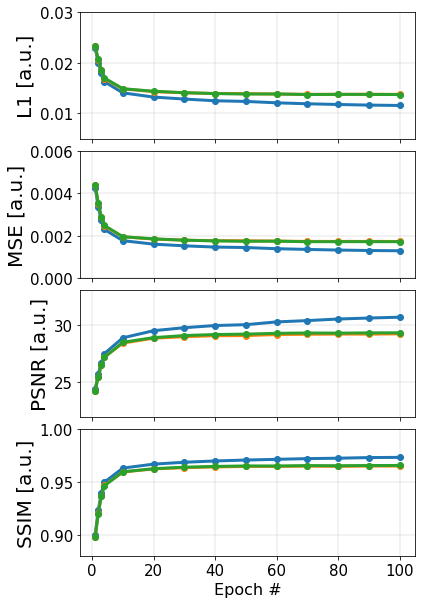

<ipython-input-21-8a81355832c4>:63: RuntimeWarning: invalid value encountered in true_divide
  im_real = real[:,:,0]/np.max(real[:,:,0])
<ipython-input-21-8a81355832c4>:72: RuntimeWarning: Mean of empty slice
  L1list.append(np.nanmean(loss1))
<ipython-input-21-8a81355832c4>:75: RuntimeWarning: Mean of empty slice
  L2list.append(np.nanmean(loss2))
<ipython-input-21-8a81355832c4>:62: RuntimeWarning: invalid value encountered in true_divide
  im_fake = fake[:,:,0]/np.max(fake[:,:,0])


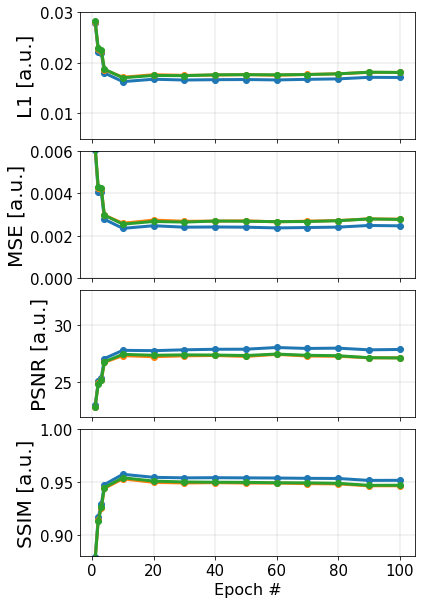

<ipython-input-21-8a81355832c4>:63: RuntimeWarning: invalid value encountered in true_divide
  im_real = real[:,:,0]/np.max(real[:,:,0])
<ipython-input-21-8a81355832c4>:72: RuntimeWarning: Mean of empty slice
  L1list.append(np.nanmean(loss1))
<ipython-input-21-8a81355832c4>:75: RuntimeWarning: Mean of empty slice
  L2list.append(np.nanmean(loss2))
<ipython-input-21-8a81355832c4>:62: RuntimeWarning: invalid value encountered in true_divide
  im_fake = fake[:,:,0]/np.max(fake[:,:,0])


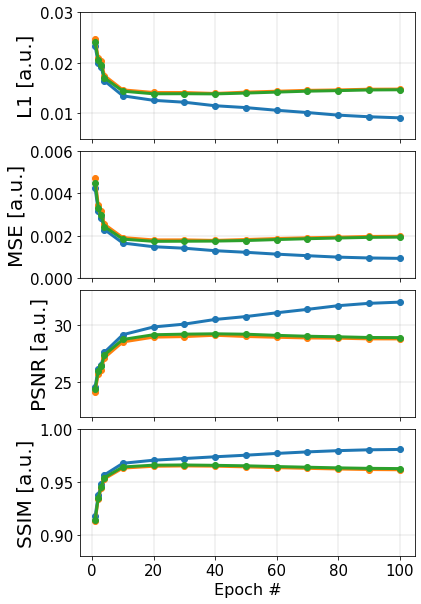

<ipython-input-21-8a81355832c4>:63: RuntimeWarning: invalid value encountered in true_divide
  im_real = real[:,:,0]/np.max(real[:,:,0])
<ipython-input-21-8a81355832c4>:72: RuntimeWarning: Mean of empty slice
  L1list.append(np.nanmean(loss1))
<ipython-input-21-8a81355832c4>:75: RuntimeWarning: Mean of empty slice
  L2list.append(np.nanmean(loss2))
<ipython-input-21-8a81355832c4>:62: RuntimeWarning: invalid value encountered in true_divide
  im_fake = fake[:,:,0]/np.max(fake[:,:,0])


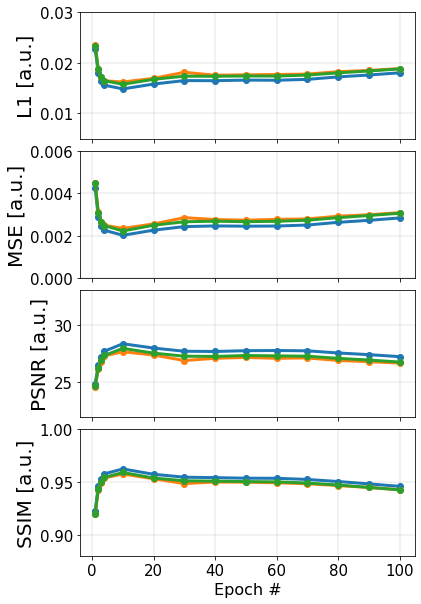

In [21]:
import imageio
import glob
#resnet_nogan - TEST
extensions = '.png'

ii=1


networks = ['resnet_nogan','resnet_gan','unet_nogan','unet_gan']


datas = ['_train','','_valid']
epochs = [1,2,3,4,10,20,30,40,50,60,70,80,90,100]

mse_all = np.zeros((len(epochs),3))
ssim_all = np.zeros((len(epochs),3))
L1_all = np.zeros((len(epochs),3))
L2_all = np.zeros((len(epochs),3))
psnr_all = np.zeros((len(epochs),3))

for nnn in range(len(networks)):
    network = networks[nnn]
    for dd in range(3):
        for ee in range(len(epochs)):
            num = epochs[ee]
            data = datas[dd]


            path = '/Users/arielhannum/Documents/Stanford/CMR-Setsompop/Projects/Noise/ultron/models_results'
            pathname = path + data + '/' + network +'/test_' + str(num)

            fakelist = []
            reallist = []
            for subdir, dirs, files in os.walk(pathname):
                    for file in files:
                        ext = os.path.splitext(file)[-1].lower()
                        if ext in extensions:
                            t=(os.path.splitext(file))
                            tt  = t[0].split('_')
                            example_filename = os.path.join(subdir, file)
                            if tt[-1] == 'B':
                                if tt[1] == 'fake':
                                    fakelist.append(example_filename)
                                if tt[1] == 'real':
                                    reallist.append(example_filename)

            fakelist = np.sort(fakelist)
            reallist = np.sort(reallist)


            mselist = []
            ssimlist = []
            L1list = []
            L2list = []
            psnrlist = []

            imfake = np.zeros((128,128,len(fakelist)))
            for ii in range(len(fakelist)):
                fake= imageio.imread(fakelist[ii])
                real= imageio.imread(reallist[ii])

                im_fake = fake[:,:,0]/np.max(fake[:,:,0])
                im_real = real[:,:,0]/np.max(real[:,:,0])

                mse = mean_squared_error(im_real,im_fake)
                mselist.append(mse)

                structsim = ssim(im_real,im_fake)
                ssimlist.append(structsim)

                loss1 = abs(im_real-im_fake)
                L1list.append(np.nanmean(loss1))

                loss2 = (im_real-im_fake)**2
                L2list.append(np.nanmean(loss2))

                psnr = peak_signal_noise_ratio(im_real,im_fake)
                psnrlist.append(psnr)


            mse_all[ee,dd] = np.nanmean(mselist)
            ssim_all[ee,dd] = np.nanmean(ssimlist)
            L1_all[ee,dd] = np.nanmean(L1list )
            L2_all[ee,dd] = np.nanmean(L2list)
            psnr_all[ee,dd] = np.nanmean(psnrlist)


    fig = plt.figure(figsize=(6, 10))
    gs = fig.add_gridspec(4, hspace=0.1)
    axs = gs.subplots(sharex=True, sharey=False)

    axs[0].plot(epochs,L1_all,'o-',linewidth=3)
    axs[0].grid(color='gray', linestyle='-', linewidth=0.2)

    axs[1].plot(epochs,mse_all,'o-',linewidth=3)
    axs[1].grid(color='gray', linestyle='-', linewidth=0.2)

    axs[2].plot(epochs,psnr_all,'o-',linewidth=3)
    axs[2].grid(color='gray', linestyle='-', linewidth=0.2)

    axs[3].plot(epochs,ssim_all,'o-',linewidth=3)
    axs[3].grid(color='gray', linestyle='-', linewidth=0.2)


    axs[0].set_ylabel('L1 [a.u.]',size =20)
    axs[1].set_ylabel('MSE [a.u.]',size =20)
    axs[2].set_ylabel('PSNR [a.u.]',size =20)
    axs[3].set_ylabel('SSIM [a.u.]',size =20)
    axs[3].set_xlabel('Epoch #',size =16)

    plt.xticks(fontsize = 15)
    axs[0].tick_params(axis='y', labelsize=15)
    axs[1].tick_params(axis='y', labelsize=15)
    axs[2].tick_params(axis='y', labelsize=15)
    axs[3].tick_params(axis='y', labelsize=15)

    axs[0].set_ylim([0.005,0.03])
    axs[1].set_ylim([0.000,0.006])
    axs[2].set_ylim([22,33])
    axs[3].set_ylim([0.88,1])

    plt.show()

In [252]:
len(reallist)

100